## Stock Market Analysis & Prediction Using LSTM

### Using Keras & Tensorflow > 2.0

In [11]:
import pandas_datareader as pdr

In [13]:
df = pdr.get_data_tiingo('AAPL', api_key = '1d7b20305873aaacd13fb46eaef129aede7cf626')

C:\Users\Ayush Pratap Singh\AppData\Local\Temp\ipykernel_5788\692143963.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key = '1d7b20305873aaacd13fb46eaef129aede7cf626')


In [14]:
df.to_csv('AAPL.csv')

In [16]:
import pandas as pd

In [18]:
df.tail()

close     high      low     open    volume  \
symbol date                                                                     
AAPL   2023-08-21 00:00:00+00:00  175.84  176.130  173.735  175.070  46311879   
       2023-08-22 00:00:00+00:00  177.23  177.680  176.250  177.060  42084245   
       2023-08-23 00:00:00+00:00  181.12  181.550  178.325  178.520  52722752   
       2023-08-24 00:00:00+00:00  176.38  181.104  176.010  180.674  54945798   
       2023-08-25 00:00:00+00:00  178.61  179.150  175.820  177.380  51449594   

                                  adjClose  adjHigh   adjLow  adjOpen  \
symbol date                                                             
AAPL   2023-08-21 00:00:00+00:00    175.84  176.130  173.735  175.070   
       2023-08-22 00:00:00+00:00    177.23  177.680  176.250  177.060   
       2023-08-23 00:00:00+00:00    181.12  181.550  178.325  178.520   
       2023-08-24 00:00:00+00:00    176.38  181.104  176.010  180.674   
       2023-08-25 00:00:00+00:00    178.61  179.150  175.820  177.380   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2023-08-21 00:00:00+00:00   46311879      0.0          1.0  
       2023-08-22 00:00:00+00:00   42084245      0.0          1.0  
       2023-08-23 00:00:00+00:00   52722752      0.0          1.0  
       2023-08-24 00:00:00+00:00   54945798      0.0          1.0  
       2023-08-25 00:00:00+00:00   51449594      0.0          1.0

In [19]:
df1 =  df.reset_index()['close']

In [20]:
df1.shape

(1258,)

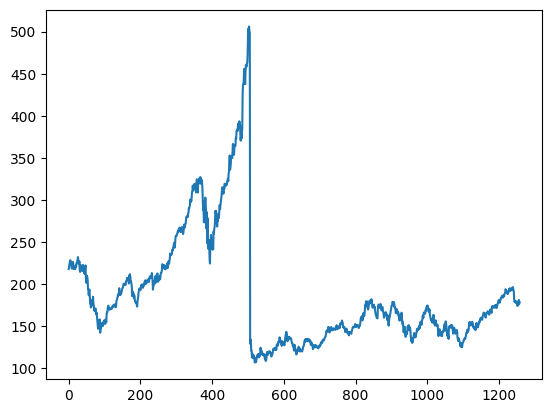

In [21]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [22]:
# Applying MinMax Scaler as LSTM is sensitive to scale of data

In [23]:
import numpy as np

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
df1.shape

(1258, 1)

### Splitting into Train & Test

In [27]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [28]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i: (i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [29]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

### Implementing a stacked LSTM Model

In [31]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 24s 673ms/step - loss: 0.0346 - val_loss: 6.6909e-04
Epoch 2/100
12/12 [==============================] - 4s 366ms/step - loss: 0.0151 - val_loss: 7.5872e-04
Epoch 3/100
12/12 [==============================] - 4s 321ms/step - loss: 0.0127 - val_loss: 0.0025
Epoch 4/100
12/12 [==============================] - 4s 297ms/step - loss: 0.0108 - val_loss: 4.6634e-04
Epoch 5/100
12/12 [==============================] - 3s 269ms/step - loss: 0.0086 - val_loss: 5.2560e-04
Epoch 6/100
12/12 [==============================] - 3s 288ms/step - loss: 0.0077 - val_loss: 0.0011
Epoch 7/100
12/12 [==============================] - 3s 266ms/step - loss: 0.0074 - val_loss: 7.2345e-04
Epoch 8/100
12/12 [==============================] - 3s 263ms/step - loss: 0.0065 - val_loss: 3.0007e-04
Epoch 9/100
12/12 [==============================] - 3s 263ms/step - loss: 0.0060 - val_loss: 3.0057e-04
Epoch 10/100
12/12 [==============================] - 3s 268ms

In [36]:
import tensorflow as tf

### Prediction & Performance Metrics

In [37]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 66ms/step


In [38]:
# Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [39]:
# Calculate RMSE performance metrics for train data
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

216.2903597148184

In [40]:
# Calculate RMSE performance metrics for test data
math.sqrt(mean_squared_error(ytest, test_predict))

163.0134274223219

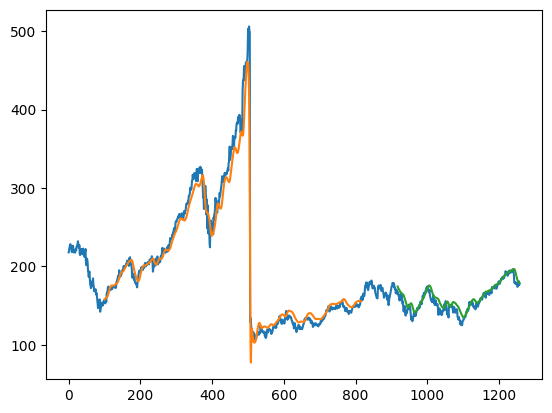

In [41]:
# Plotting the results
# Shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# Shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


### Predicting The Future 30 Days Values

In [42]:
len(test_data)

441

In [45]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [47]:
temp_input

[0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,
 0.17635566687539134,
 0.1834690043832185,
 0.1856230432060112,
 0.18219160926737632,
 0.18126487163431432,
 0.1777833437695679,
 0.18467125860989347,
 

In [48]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<30):
        
        if(len(temp_input)>100):
            #print(temp_input)
            x_input = np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input = x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
print(lst_output)

[0.18162958]
101
1 day input [0.14256731 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577
 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323
 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969
 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993
 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425
 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566
 0.17179712 0.1764809  0.17635567 0.183469   0.18562304 0.18219161
 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413
 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646
 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362 0.21823419
 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902 0.20348153
 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306 0.2210645
 0.21613024 0.21314966 0.21517846 0.21735755 0.21956168 0.21635567
 0.22289292 0.22444584 0.22232937 0.21475266 0.21122104 0.18822793
 0.18036318 0.18274264 0.17871008 

In [49]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [50]:
import matplotlib.pyplot as plt


In [51]:
df3 = df1.tolist()
df3.extend(lst_output)

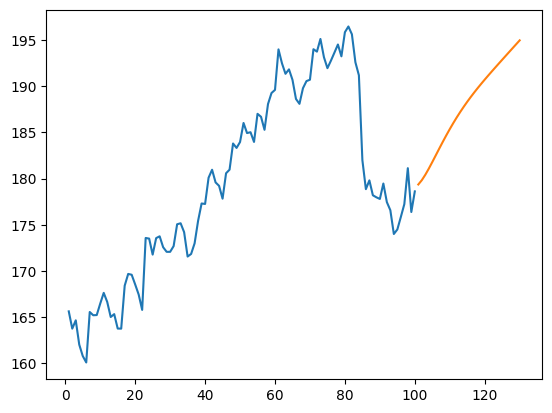

In [52]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

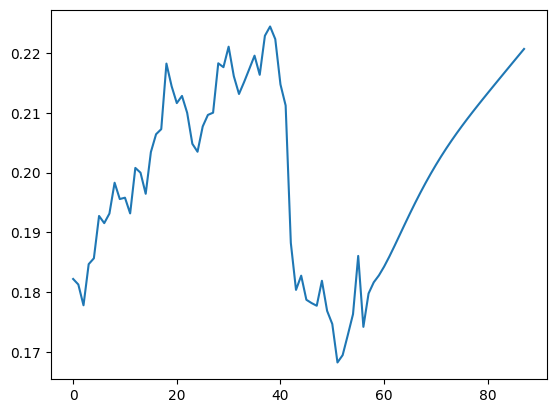

In [53]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

### Saving The Model

In [ ]:
#save the model
import pickle
